In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Enable inline plotting in Jupyter notebooks
plt.ion()  # Alternative to '%matplotlib inline'


In [5]:
# Define a transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor()
])


In [6]:
# Define root directory for dataset
data_root = 'C:\\Users\\venka\\DeepLearning'

# Load training and test datasets
train_data_set = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)


In [7]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\venka\DeepLearning
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [8]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\venka\DeepLearning
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [9]:
# Set batch sizes for training and testing
train_batch_size = 500
test_batch_size = 100

# Create DataLoaders for training and testing
train_loader = DataLoader(train_data_set, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=test_batch_size, shuffle=False)


In [10]:
def calculate_params(model):
    """Calculate the number of trainable parameters in a model."""
    return sum(param.numel() for param in model.parameters() if param.requires_grad)


In [11]:
class Model1(nn.Module):
    def __init__(self, in_features=784, hidden1=2, hidden2=5, out_features=10):
        super(Model1, self).__init__()
        # Define fully connected layers
        self.fc1 = nn.Linear(in_features, hidden1)    
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.output = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        # Forward pass through the network with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x


In [12]:
model1=Model1()

In [13]:
model1

Model1(
  (fc1): Linear(in_features=784, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=10, bias=True)
)

In [14]:
# Calculate the number of parameters
model1_params = calculate_params(model1)

# Print the number of parameters
print(f"Number of parameters in Model1: {model1_params}")


Number of parameters in Model1: 1645


In [15]:
def get_criterion():
    """Return the loss function used for classification tasks."""
    return nn.CrossEntropyLoss()

# Example usage
criterion1 = get_criterion()


In [16]:
def get_optimizer(model, lr=0.001):
    """Return an Adam optimizer for the given model with the specified learning rate."""
    return torch.optim.Adam(model1.parameters(), lr=lr)

# Example usage
optimizer1 = get_optimizer(model1)


In [17]:
epochs = 30
train_correct_mod1 = []
test_correct_mod1 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        y_pred = model1(X_train.view(500, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod1=loss
    train_correct_mod1.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model1(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion1(y_val, y_test)
    test_losses_mod1=(loss)
    test_correct_mod1.append(test_corr)
    

In [18]:
# Convert the list of training losses to a NumPy array
train_losses_mod1= train_losses_mod1.detach().numpy()

In [115]:
# Calculate and print training accuracies for each epoch
for t in train_correct_mod1:
    trn_accu_mod1=t/600
    
print(trn_accu_mod1)

tensor(67.7583)


In [116]:
for t in test_correct_mod1:
    tst_accu_mod1=t/100
    
print(tst_accu_mod1)

tensor(68.3400)


In [ ]:
#---------------------------------------Model2-------------------------------#

In [21]:
class Model2(nn.Module):
    def __init__(self, input_size=784, hidden_size1=4, hidden_size2=6, output_size=10):
        """Initializes the layers of the model."""
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.out = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        """Defines the forward pass of the model."""
        x = F.relu(self.fc1(x))  # Apply ReLU to the first hidden layer
        x = F.relu(self.fc2(x))  # Apply ReLU to the second hidden layer
        x = self.out(x)  # Output layer
        return x


In [22]:
model2=Model2()
model2

Model2(
  (fc1): Linear(in_features=784, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=10, bias=True)
)

In [23]:
# Define the function
def CalcParams(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Calculate and print the number of trainable parameters in Model2
model2_params = CalcParams(model2)
print(f"Number of parameters in Model2: {model2_params}")


Number of parameters in Model2: 3240


In [24]:
# Define the loss function for Model2
loss_function2 = nn.CrossEntropyLoss()


In [25]:
# Define the optimizer for Model2
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)


In [32]:
epochs = 30
train_correct_mod2 = []
test_correct_mod2 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model2(X_train.view(500, -1))  
        loss = loss_function2(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        
              
        # Update parameters
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        
#     print(train_corr.item()*100/(100*b))
    # Update train loss & accuracy for the epoch
    train_losses_mod2=loss
    train_correct_mod2.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model2(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = loss_function2(y_val, y_test)
    test_losses_mod2=(loss)
    test_correct_mod2.append(test_corr)
        

In [33]:

train_losses_mod2= train_losses_mod2.detach().numpy()

In [34]:
for t in train_correct_mod2:
    trn_accu_mod2=t/600
    
print(trn_accu_mod2)

tensor(88.7217)


In [35]:
for t in test_correct_mod2:
    tst_accu_mod2=t/100
    
print(tst_accu_mod2)

tensor(87.7500)


In [ ]:
#----------------------------------------------------Model3------------------------------------------#

In [36]:
class Model3(nn.Module):
    def __init__(self, in_features=784, h1=10, h2=20, out_features=10):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [37]:
model3=Model3()
model3

Model3(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [38]:
# Define CalcParams if not already defined
def CalcParams(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Create an instance of Model3
model3 = Model3()

# Calculate the number of parameters in model3
model3params = CalcParams(model3)
print(f'Model3 Parameters: {model3params}')


Model3 Parameters: 8280


In [39]:
# Define loss function
criterion3 = nn.CrossEntropyLoss()

# Define optimizer
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)


In [40]:
epochs = 30
train_correct_mod3 = []
test_correct_mod3 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model3(X_train.view(500, -1))  
        loss = criterion3(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod3=loss
    train_correct_mod3.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model3(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion3(y_val, y_test)
    test_losses_mod3=loss
    test_correct_mod3.append(test_corr)

In [43]:
train_losses_mod3= train_losses_mod3.detach().numpy()

In [44]:
for t in train_correct_mod3:
    trn_accu_mod3=t/600
    
print(trn_accu_mod3)

tensor(94.5467)


In [45]:
for t in test_correct_mod3:
    tst_accu_mod3=t/100
    
print(tst_accu_mod3)

tensor(93.8000)


In [ ]:
#---------------------------------------------------Model4----------------------------------------#

In [46]:
class Model4(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=40, out_features=10):
        super(Model4, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [47]:
model4=Model4()
model4

Model4(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=10, bias=True)
)

In [48]:
# Assuming CalcParams function is defined as follows
def CalcParams(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Instantiate the model
model4 = Model4()

# Calculate the number of parameters
model4params = CalcParams(model4)
print(model4params)


16950


In [49]:
# Define loss function
criterion4 = nn.CrossEntropyLoss()

# Define optimizer
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.001)


In [50]:
epochs = 30
train_correct_mod4 = []
test_correct_mod4 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model4(X_train.view(500, -1))  
        loss = criterion4(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer4.zero_grad()
        loss.backward()
        optimizer4.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod4=loss
    train_correct_mod4.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model4(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion4(y_val, y_test)
    test_losses_mod4=loss
    test_correct_mod4.append(test_corr)

In [52]:
train_losses_mod4 = train_losses_mod4.detach().numpy()

In [53]:
for t in train_correct_mod4:
    trn_accu_mod4=t/600
    
print(trn_accu_mod4)

tensor(97.1400)


In [54]:
for t in test_correct_mod4:
    tst_accu_mod4=t/100
    
print(tst_accu_mod4)


tensor(96.1400)


In [ ]:
#--------------------------------------------------Model5---------------------------------------#

In [55]:
class Model5(nn.Module):
    def __init__(self, in_features=784, h1=50, h2=80, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [56]:
model5=Model5()
model5

Model5(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=80, bias=True)
  (out): Linear(in_features=80, out_features=10, bias=True)
)

In [57]:
# Initialize Model5
model5 = Model5()

# Calculate the number of parameters in Model5
model5params = CalcParams(model5)

# Print the number of parameters
print(model5params)


44140


In [58]:
# Define the loss function
criterion5 = nn.CrossEntropyLoss()

# Define the optimizer
optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.001)


In [59]:
epochs = 30
train_correct_mod5 = []
test_correct_mod5 = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for X_train, y_train in train_loader:
        # Forward pass
        y_pred = model5(X_train.view(X_train.size(0), -1))  
        loss = criterion5(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer5.zero_grad()
        loss.backward()
        optimizer5.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod5 = loss.item()  # Use .item() to get a Python number from a tensor
    train_correct_mod5.append(train_corr.item())  # Use .item() for correct predictions
    
    # Run the testing batches
    with torch.no_grad():
        for X_test, y_test in test_loader:
            # Forward pass
            y_val = model5(X_test.view(X_test.size(0), -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    test_losses_mod5 = criterion5(y_val, y_test).item()  # Use .item() for loss
    test_correct_mod5.append(test_corr.item())  # Use .item() for correct predictions


In [60]:
# Convert train_losses_mod5 to a NumPy array if necessary
# This conversion is only needed if you need to handle the loss values as an array later.
# If train_losses_mod5 is a single number, you can omit this conversion.

train_losses_mod5 = np.array([train_losses_mod5])  # Wrap in a list to convert to a single-element NumPy array


In [61]:
for t in train_correct_mod5:
    trn_accu_mod5=t/600
    
print(trn_accu_mod5)

99.17166666666667


In [62]:
for t in test_correct_mod5:
    tst_accu_mod5=t/100
    
print(tst_accu_mod5)

97.61


In [ ]:
#-----------------------------------------------------Model6---------------------------------#

In [63]:
class Model6(nn.Module):
    def __init__(self, in_features=784, hidden1=100, hidden2=120, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden1)    
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [64]:
model6=Model6()
model6

Model6(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=120, bias=True)
  (out): Linear(in_features=120, out_features=10, bias=True)
)

In [65]:
# Instantiate Model6
model6 = Model6()

# Calculate and print the number of parameters
model6params = CalcParams(model6)
print(model6params)


91830


In [66]:
# Define loss function and optimizer for Model6
criterion6 = nn.CrossEntropyLoss()
optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.001)


In [67]:
epochs = 30
train_correct_mod6 = []
test_correct_mod6 = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        # Forward pass
        y_pred = model6(X_train.view(500, -1))
        loss = criterion6(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        # Update parameters
        optimizer6.zero_grad()
        loss.backward()
        optimizer6.step()

    # Update train loss & accuracy for the epoch
    train_losses_mod6 = loss.detach().numpy()
    train_correct_mod6.append(train_corr.item())

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Forward pass
            y_val = model6(X_test.view(100, -1))

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    # Update test loss & accuracy for the epoch
    loss = criterion6(y_val, y_test)
    test_losses_mod6 = loss.detach().numpy()
    test_correct_mod6.append(test_corr.item())


In [68]:
# Make sure train_losses_mod6 is a tensor
if isinstance(train_losses_mod6, torch.Tensor):
    train_losses_mod6 = train_losses_mod6.detach().numpy()


In [69]:
for t in train_correct_mod6:
    trn_accu_mod6=t/600
    
print(trn_accu_mod6)

99.88333333333334


In [70]:
for t in test_correct_mod6:
    tst_accu_mod6=t/100
    
print(tst_accu_mod6)

97.72


In [ ]:
#------------------------------------------------------Model7----------------------------------------#

In [71]:
class Model7(nn.Module):
    def __init__(self, in_features=784, h1=180, h2=100, out_features=10):
        super(Model7, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [72]:
model7=Model7()
model7

Model7(
  (fc1): Linear(in_features=784, out_features=180, bias=True)
  (fc2): Linear(in_features=180, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
)

In [73]:
model7 = Model7()
model7params = CalcParams(model7)
print(model7params)


160410


In [74]:
criterion7 = nn.CrossEntropyLoss()
optimizer7 = torch.optim.Adam(model7.parameters(), lr=0.001)


In [75]:
epochs = 30
train_correct_mod7 = []
test_correct_mod7 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model7(X_train.view(500, -1))  
        loss = criterion7(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer7.zero_grad()
        loss.backward()
        optimizer7.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod7=loss
    train_correct_mod7.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model7(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion7(y_val, y_test)
    test_losses_mod7=loss
    test_correct_mod7.append(test_corr)

In [76]:
if isinstance(train_losses_mod7, torch.Tensor):
    train_losses_mod7 = train_losses_mod7.detach().numpy()

In [77]:
for t in train_correct_mod7:
    trn_accu_mod7=t/600
    
print(trn_accu_mod7)

tensor(99.9650)


In [78]:
for t in test_correct_mod7:
    tst_accu_mod7=t/100
    
print(tst_accu_mod7)

tensor(97.8600)


In [ ]:
#-----------------------------------------------Model8---------------------------------------#

In [79]:
class Model8(nn.Module):
    def __init__(self, in_features=784, h1=400, h2=200, out_features=10):
        super(Model8, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [80]:
model8=Model8()
model8

Model8(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (out): Linear(in_features=200, out_features=10, bias=True)
)

In [81]:
model8 = Model8()  # Initialize Model8
model8params = CalcParams(model8)  # Calculate parameters
print("Model8 Parameters:", model8params)  # Print the number of parameters


Model8 Parameters: 396210


In [82]:
# Initialize criterion and optimizer for Model8
criterion8 = nn.CrossEntropyLoss()  # Define the loss function
optimizer8 = torch.optim.Adam(model8.parameters(), lr=0.001)  # Define the optimizer


In [83]:
epochs = 30
train_correct_mod8 = []
test_correct_mod8 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model8(X_train.view(500, -1))  
        loss = criterion8(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer8.zero_grad()
        loss.backward()
        optimizer8.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod8=loss
    train_correct_mod8.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model8(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion8(y_val, y_test)
    test_losses_mod8=loss
    test_correct_mod8.append(test_corr)

In [84]:
if isinstance(train_losses_mod8, torch.Tensor):
    train_losses_mod8 = train_losses_mod8.detach().numpy()

In [85]:
for t in train_correct_mod8:
    trn_accu_mod8=t/600
    
print(trn_accu_mod8)

tensor(100.)


In [86]:
for t in test_correct_mod8:
    tst_accu_mod8=t/100
    
print(tst_accu_mod8)

tensor(98.1300)


In [ ]:
#----------------------------------------------Model9

In [87]:
class Model9(nn.Module):
    def __init__(self, in_features=784, h1=600, h2=300, out_features=10):
        super(Model9, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [88]:
model9=Model9()
model9

Model9(
  (fc1): Linear(in_features=784, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=300, bias=True)
  (out): Linear(in_features=300, out_features=10, bias=True)
)

In [89]:
model9 = Model9()  # Initialize the model
model9params = CalcParams(model9)  # Calculate parameters
print(model9params)  # Print the number of parameters


654310


In [90]:
# Define the loss function
criterion9 = nn.CrossEntropyLoss()

# Define the optimizer
optimizer9 = torch.optim.Adam(model9.parameters(), lr=0.001)


In [91]:
epochs = 30
train_correct_mod9 = []
test_correct_mod9 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
     
        y_pred = model9(X_train.view(500, -1))  
        loss = criterion9(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer9.zero_grad()
        loss.backward()
        optimizer9.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod9=loss
    train_correct_mod9.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model9(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion9(y_val, y_test)
    test_losses_mod9=loss
    test_correct_mod9.append(test_corr)

In [106]:
train_losses_mod9 = train_losses_mod9.detach().numpy()

In [107]:
for t in train_correct_mod9:
    trn_accu_mod9=t/600
    
print(trn_accu_mod9)

tensor(100.)


In [108]:
for t in test_correct_mod9:
    tst_accu_mod9=t/100
    
print(tst_accu_mod9)

tensor(98.3200)


In [109]:
class Model10(nn.Module):
    def __init__(self, in_features=784, h1=800, h2=400, out_features=10):
        super(Model10, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [110]:
model10=Model10()
model10

Model10(
  (fc1): Linear(in_features=784, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (out): Linear(in_features=400, out_features=10, bias=True)
)

In [96]:
# Calculate the number of parameters for Model10
model10params = CalcParams(model10)
print(model10params)


952410


In [97]:
# Define the criterion and optimizer for Model10
criterion10 = nn.CrossEntropyLoss()
optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.001)


In [98]:
epochs = 30
train_correct_mod10 = []
test_correct_mod10 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
      
        y_pred = model10(X_train.view(500, -1))  
        loss = criterion10(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer10.zero_grad()
        loss.backward()
        optimizer10.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod10=loss
    train_correct_mod10.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model10(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion10(y_val, y_test)
    test_losses_mod10=loss
    test_correct_mod10.append(test_corr)
        

In [99]:
train_losses_mod10 = train_losses_mod10.detach().numpy()

In [100]:
for t in train_correct_mod10:
    trn_accu_mod10=t/600
    
print(trn_accu_mod10)

tensor(100.)


In [101]:
for t in test_correct_mod10:
    tst_accu_mod10=t/100
    
print(tst_accu_mod10)

tensor(98.3900)


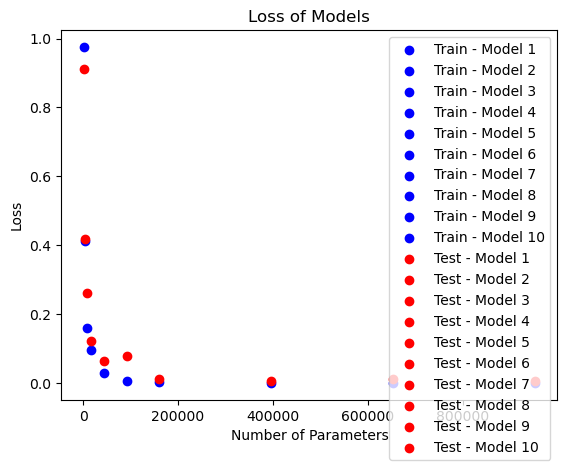

In [111]:
import matplotlib.pyplot as plt

# Training Loss
plt.scatter(model1_params, train_losses_mod1, c='b', label='Train - Model 1')
plt.scatter(model2_params, train_losses_mod2, c='b', label='Train - Model 2')
plt.scatter(model3params, train_losses_mod3, c='b', label='Train - Model 3')
plt.scatter(model4params, train_losses_mod4, c='b', label='Train - Model 4')
plt.scatter(model5params, train_losses_mod5, c='b', label='Train - Model 5')
plt.scatter(model6params, train_losses_mod6, c='b', label='Train - Model 6')
plt.scatter(model7params, train_losses_mod7, c='b', label='Train - Model 7')
plt.scatter(model8params, train_losses_mod8, c='b', label='Train - Model 8')
plt.scatter(model9params, train_losses_mod9, c='b', label='Train - Model 9')
plt.scatter(model10params, train_losses_mod10, c='b', label='Train - Model 10')

# Testing Loss
plt.scatter(model1_params, test_losses_mod1, c='r', label='Test - Model 1')
plt.scatter(model2_params, test_losses_mod2, c='r', label='Test - Model 2')
plt.scatter(model3params, test_losses_mod3, c='r', label='Test - Model 3')
plt.scatter(model4params, test_losses_mod4, c='r', label='Test - Model 4')
plt.scatter(model5params, test_losses_mod5, c='r', label='Test - Model 5')
plt.scatter(model6params, test_losses_mod6, c='r', label='Test - Model 6')
plt.scatter(model7params, test_losses_mod7, c='r', label='Test - Model 7')
plt.scatter(model8params, test_losses_mod8, c='r', label='Test - Model 8')
plt.scatter(model9params, test_losses_mod9, c='r', label='Test - Model 9')
plt.scatter(model10params, test_losses_mod10, c='r', label='Test - Model 10')

plt.title("Loss of Models")
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()


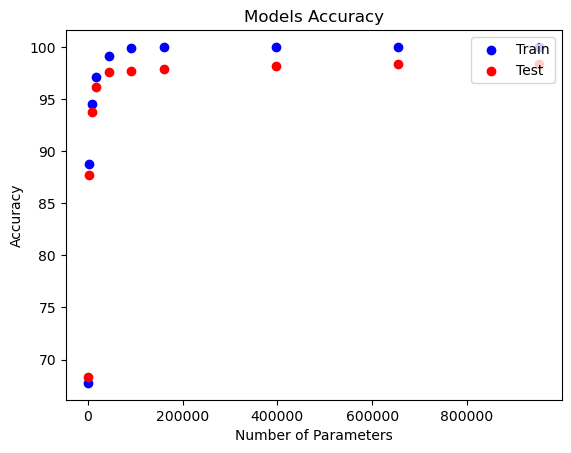

In [118]:
plt.scatter(model1_params, trn_accu_mod1,c='b',label='Train')
plt.scatter(model2_params, trn_accu_mod2,c='b')
plt.scatter(model3params, trn_accu_mod3,c='b')
plt.scatter(model4params, trn_accu_mod4,c='b')
plt.scatter(model5params, trn_accu_mod5,c='b')
plt.scatter(model6params, trn_accu_mod6,c='b')
plt.scatter(model7params, trn_accu_mod7,c='b')
plt.scatter(model8params, trn_accu_mod8,c='b')
plt.scatter(model9params, trn_accu_mod9,c='b')
plt.scatter(model10params, trn_accu_mod10,c='b')

#Testing Accuracy

plt.scatter(model1_params, tst_accu_mod1,c='r',label='Test')
plt.scatter(model2_params, tst_accu_mod2,c='r')
plt.scatter(model3params, tst_accu_mod3,c='r')
plt.scatter(model4params, tst_accu_mod4,c='r')
plt.scatter(model5params, tst_accu_mod5,c='r')
plt.scatter(model6params, tst_accu_mod6,c='r')
plt.scatter(model7params, tst_accu_mod7,c='r')
plt.scatter(model8params, tst_accu_mod8,c='r')
plt.scatter(model9params, tst_accu_mod9,c='r')
plt.scatter(model10params, tst_accu_mod10,c='r')

plt.title("Models Accuracy")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()